# 0. Introduction and Project Overview 

** Purpose: ** To perform analytics on cash expenses in the UK business and to assist with 

** Data: ** The data used is obtained from D365 accounting system


# 1.Importing Critical Components

In [ ]:
import pandas as pd
import matplotlib as plt
from matplotlib import pyplot as plt 
import seaborn as sns
import numpy as np
import openpyxl
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 2.Importing the files (D365 and Google)

In [ ]:
# Import the file from Google Drive
file = ('/content/drive/MyDrive/cashpurchases.xlsx') 
df = pd.read_excel(file)

In [ ]:
# Get an initial overview of the the fields and what the file looks like
df.head(5)

In [ ]:
# Rename the Date header file
df.rename(columns={'___Date___':'Date'}, inplace=True)


# 3.Basic Exploration of the Data

# 3.1 Identify the largest invididual cash purchases within commodity categories

In [ ]:
# Extract and sum up the number of entries by commodity type
df_commodity = df['Commodity'].value_counts()
# Create a separate dataframe for and sort from highest to lowest and show the top 20
df_commodity2 = df[['Commodity', 'Value']]
df_commodity2_high = df.sort_values(by="Value", ascending=False)
df_commodity2_high = df_commodity2_high.head(20)

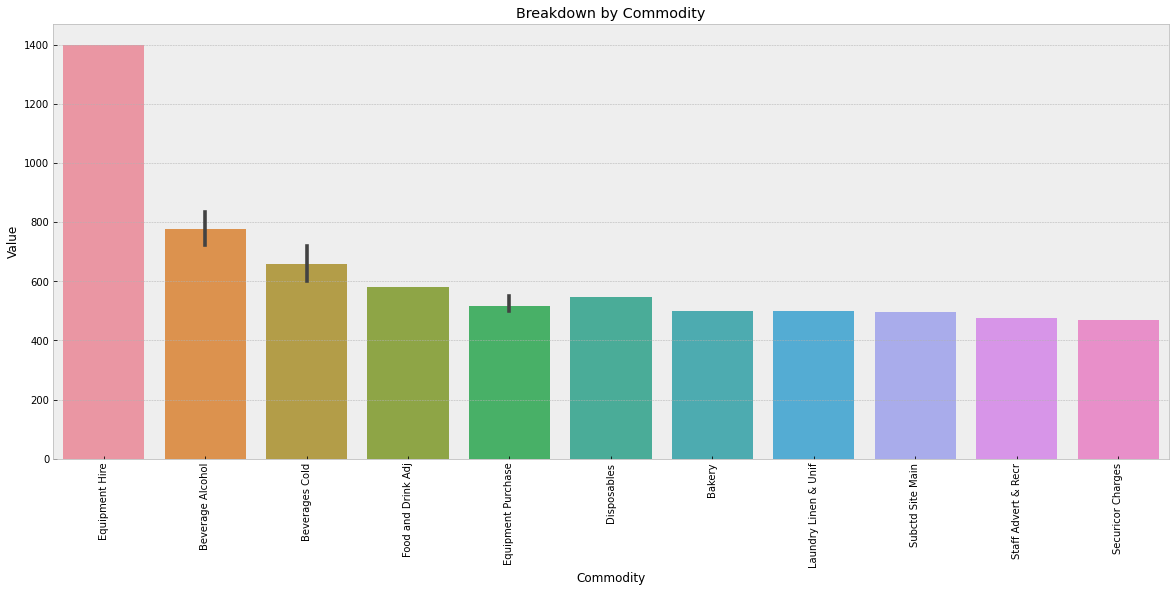

In [ ]:
#Do a quick visualisation on the above 
plt.figure(figsize=(20,8))
sns.barplot(data=df_commodity2_high, y='Value', x='Commodity')
plt.style.use('bmh')
plt.xticks(rotation=90)
plt.title("Breakdown by Commodity")
plt.show()

# 3.2 Identify the largest commodity groups by cash spend and volume

In [ ]:
# Create a dataframe just for largest spend by commodity groups
df_commodity2 = df_commodity2.groupby(['Commodity'], as_index=False).sum()
df_commmodity2_sorted = df_commodity2.sort_values(by='Value', ascending=False).head(20)

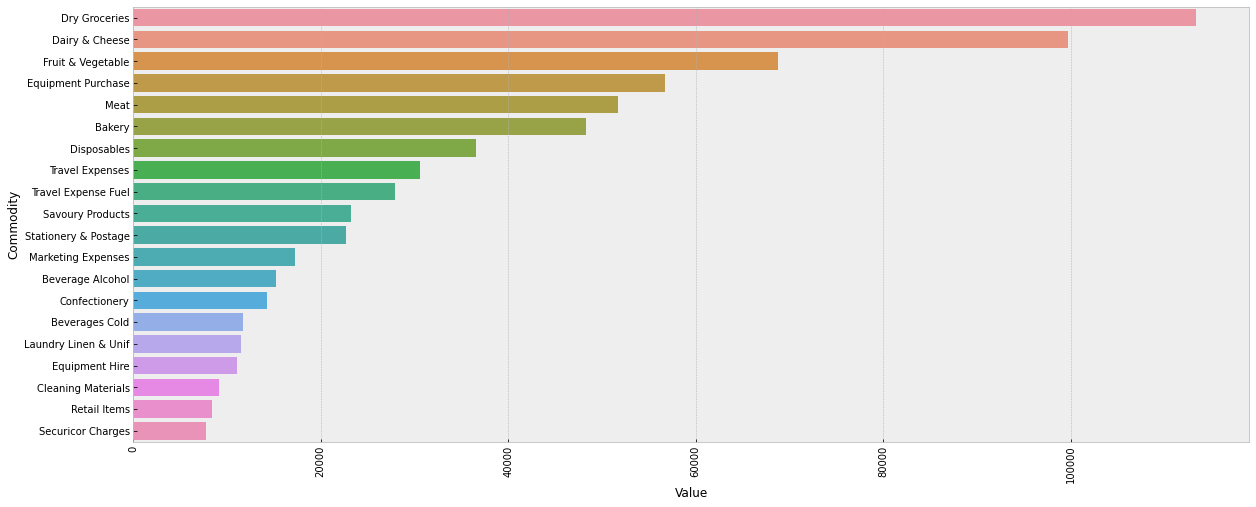

In [ ]:
#Do a quick visualisation on the above 
plt.figure(figsize=(20,8))
sns.barplot(data=df_commmodity2_sorted, y='Commodity', x='Value')
plt.style.use('bmh')
plt.xticks(rotation=90)
plt.show()

# 3.3 Identify the largest cash spend by site / location

In [ ]:
# Create a dataframe just for units and total cash spend
df_unit = df[['Trading Outlet','Value']]
df_unit_grouped = df_unit.groupby(['Trading Outlet'],as_index=False).sum()
df_unit_grouped2 = df_unit_grouped.sort_values(by='Value', ascending=False).head(20)

In [ ]:
# Do a quick visualisation on the above 
sns.barplot(data=df_unit_grouped2, y='Trading Outlet', x='Value')
plt.style.use('classic')
plt.xticks(rotation=90)
plt.show()

# 3.4 Identify the largest spend by vendor

In [ ]:
# Identify the top 20 largest vendors by spend
df_vendor = df[['Vendor Name','Value']]
df_vendor_grouped = df_vendor.groupby(['Vendor Name'],as_index=False).sum()
df_vendor_grouped2 = df_vendor_grouped.sort_values(by='Value', ascending=False).head(20)

In [ ]:
# Perform data visualisation
sns.barplot(data=df_vendor_grouped2, x='Value', y='Vendor Name')
plt.style.use('seaborn')
plt.show()

# 3.5 Analyse cash purchase reasons

(array([12066.,  1623.,  5487.,  4885., 11319.,  2161.,   621.,   525.,
          902.,    98.]),
 array([ 0. ,  1.1,  2.2,  3.3,  4.4,  5.5,  6.6,  7.7,  8.8,  9.9, 11. ]),
 <a list of 10 Patch objects>)

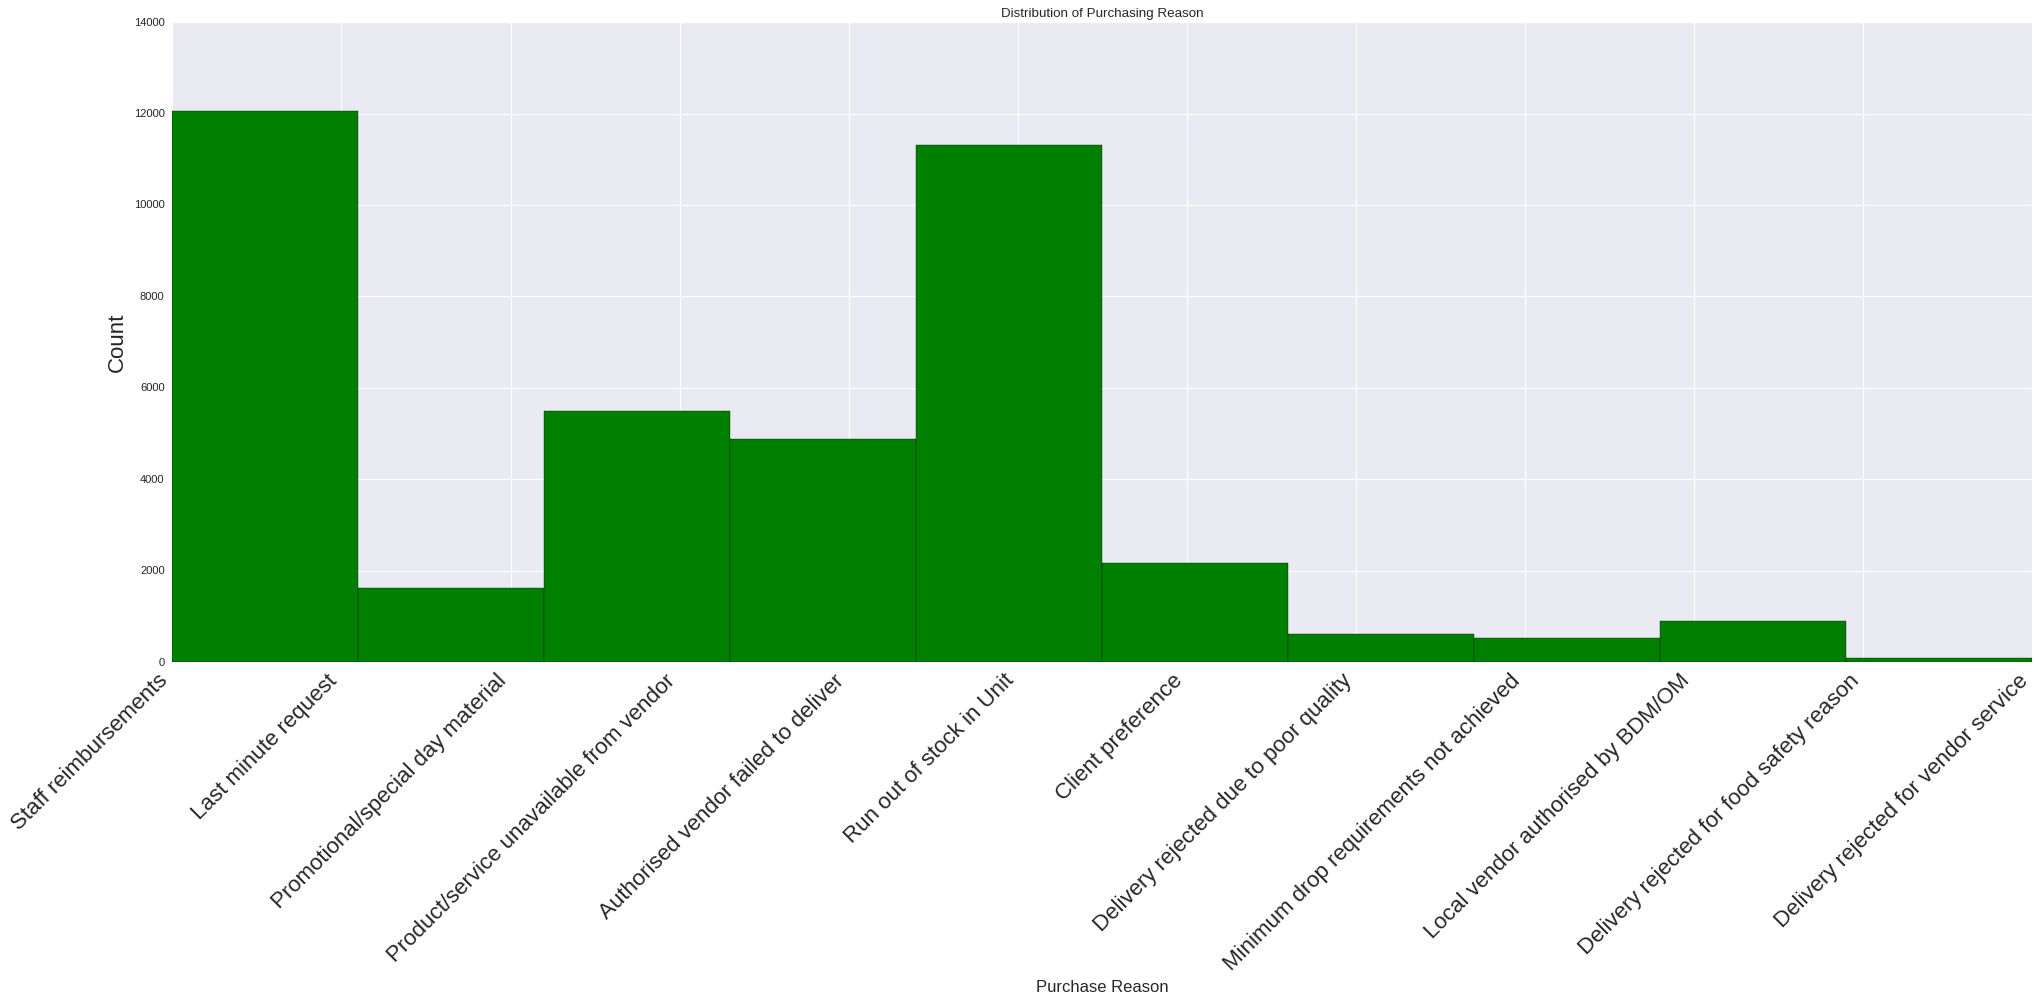

In [ ]:
plt.figure(figsize=[30,10])
plt.title("Distribution of Purchasing Reason")
plt.xlabel('Purchase Reason',fontsize=15)
plt.xticks(fontsize=20, rotation = 45, ha="right")
plt.ylabel('Count',fontsize=20)
plt.hist(df_sorted["Purchase Reason"], bins=10, range=None, density=False, weights=None, cumulative=False, bottom=None, histtype='bar', align='mid', orientation='vertical', rwidth=None, log=False, color='green', label=None, stacked=False)

# 4 Testing Strategy and Conclusions

